# 2019 Data analytics Lab @Dept. of Industrial engineering
## Information retrieval and text mining

### Contents
#### 1. Text pre-processing technique
 - 대소문자 변환
 - 숫자, 특수문자, 공백 제거
 - 키워드 추출
 - Tokenize
 - 불용어 제거
 - Stemming
 - Term frequency matrix

#### 2. Text analytics
 - Document similarity
 - Generalized VSM 
 - Social network analysis
 - Assosiation rule mining
 - Sentiment analysis

### Used library
 - SQL Alchemy: DB와 관련된 다양한 작업을 지원하는 라이브러리 (https://www.sqlalchemy.org/)
 - Pandas: 데이터분석용 툴킷, Table 형태로 데이터를 다룰 수 있고 빨라서 널리사용됨 (https://pandas.pydata.org) 
 - Sci-kit learn: Machine learning과 관련된 대부분의 모듈이 구축되어 있음 (http://scikit-learn.org)
 - Matplotlib: Plot을 그릴때 가장 널리 사용되는 라이브러리 (https://matplotlib.org/)
 - NetworkX: 네트워크관련 다양한 작업을 지원하는 패키지 (https://networkx.github.io/)
 - KoNLPy: 한국어 자연어처리를 위한 도구들을 통합해놓은 Wrapper (http://konlpy.org/)
 - re: 정규식 처리를 위한 Python 내부 패키지 (https://docs.python.org/3/library/re.html)
 - nltk: 자연어 처리 툴킷, 가장 범용적으로 사용되는 라이브러리 (https://www.nltk.org)
 - rake-nltk: 키워드 추출 알고리즘 Rake를 지원하는 라이브러리 (https://pypi.org/project/rake-nltk/)
 - spaCy: 자연어 처리 라이브러리, 특히 딥러닝과의 연계에 특화 (https://spacy.io/)
 - mlxtend: Machine learning 라이브러리 (http://rasbt.github.io/mlxtend/)
 
### Data
- 개인과제로 제공된 특허데이터 중에서, 초록 100개를 무작위 추출하여 사용함  
- Pandas를 이용하면 csv, xls 등의 파일을 읽을 수 도 있고, sql로부터 자료를 직접 가져올 수도 있음
- 본 예제에서는 sql에서 직접 가져옴

In [1]:
import pandas as pd
import sqlalchemy
import pymysql
pymysql.install_as_MySQLdb()

conn = sqlalchemy.create_engine('mysql://your id:your pw@address:port/scheme', encoding='utf-8')

query = "SELECT * FROM abstract ORDER BY rand() LIMIT 100"
data = pd.read_sql(sql=query, con=conn)
data.columns = ['app_num','abst']

C:\Users\user\Anaconda3\envs\main\lib\site-packages\pymysql\cursors.py:170: Warning: (1366, "Incorrect string value: '\\xB4\\xEB\\xC7\\xD1\\xB9\\xCE...' for column 'VARIABLE_VALUE' at row 533")
  result = self._query(query)


In [2]:
data.head()

,app_num,abst
0,9840278,A control system for a vehicle includes a stee...
1,9590078,A semiconductor device fabrication method incl...
2,9726116,A gas mixer for mixing a first gas and a secon...
3,9703092,An optical filter includes: a lower substrate;...
4,9764943,"A MEMS structure includes a planar substrate, ..."


#### 1. Text pre-processing technique  
텍스트에서 노이즈를 제거하고, 활용이 가능한 행렬형태로 변형하는 기본적인 방법들을 다룸

##### 1.1 대소문자 변환

In [3]:
sample_str = data.loc[0, 'abst']
print(sample_str)

A control system for a vehicle includes a steering system, an input including a rotatable rotary element, and a controller. The controller receives a trailer backup assist mode initiation command from the input and activates a trailer backup mode including outputting a vehicle steering command based on a first instantaneous position of the rotary element to the steering system. The controller further receives a terrain management mode initiation command from the input and activating a terrain management mode.


In [4]:
# Python str 객체의 내장 기능을 이용하는 방법
UPPER_STR = sample_str.upper()
print(UPPER_STR)
print()
lower_str = sample_str.lower()
print(lower_str)

A CONTROL SYSTEM FOR A VEHICLE INCLUDES A STEERING SYSTEM, AN INPUT INCLUDING A ROTATABLE ROTARY ELEMENT, AND A CONTROLLER. THE CONTROLLER RECEIVES A TRAILER BACKUP ASSIST MODE INITIATION COMMAND FROM THE INPUT AND ACTIVATES A TRAILER BACKUP MODE INCLUDING OUTPUTTING A VEHICLE STEERING COMMAND BASED ON A FIRST INSTANTANEOUS POSITION OF THE ROTARY ELEMENT TO THE STEERING SYSTEM. THE CONTROLLER FURTHER RECEIVES A TERRAIN MANAGEMENT MODE INITIATION COMMAND FROM THE INPUT AND ACTIVATING A TERRAIN MANAGEMENT MODE.

a control system for a vehicle includes a steering system, an input including a rotatable rotary element, and a controller. the controller receives a trailer backup assist mode initiation command from the input and activates a trailer backup mode including outputting a vehicle steering command based on a first instantaneous position of the rotary element to the steering system. the controller further receives a terrain management mode initiation command from the input and activat

In [5]:
# Pandas를 이용하여 대량 처리를 하는 방법
data['abst'] = data['abst'].str.lower()
data.head()

,app_num,abst
0,9840278,a control system for a vehicle includes a stee...
1,9590078,a semiconductor device fabrication method incl...
2,9726116,a gas mixer for mixing a first gas and a secon...
3,9703092,an optical filter includes: a lower substrate;...
4,9764943,"a mems structure includes a planar substrate, ..."


##### 1.2 숫자, 특수문자, 공백 제거

In [6]:
# Python 내장 re 라이브러리를 이용하는 방법
import re

sample = "What a 따뜻한 welcome for iPhone XR, iPhone XS and Apple Watch Series 4 in Korea this weekend! 고맙습니다! Hope you enjoy! 🎉"
UPPER = re.sub('[^A-Z]', '', sample)
print(UPPER)
lower = re.sub('[^a-z]', '', sample)
print(lower)
number = re.sub('[^0-9]', '', sample)
print(number)
korean = re.sub('[^가-힣]', '', sample)
print(korean)
result = re.sub('[^a-zA-Z0-9가-힣\s]', '', sample)
print(result)

WPXRPXSAWSKH
hatawelcomeforihoneihoneandppleatcheriesinoreathisweekendopeyouenjoy
4
따뜻한고맙습니다
What a 따뜻한 welcome for iPhone XR iPhone XS and Apple Watch Series 4 in Korea this weekend 고맙습니다 Hope you enjoy 


In [7]:
# Pandas를 이용하여 대량 처리를 하는 방법
data['abst'] = data['abst'].str.replace('[^a-zA-Z0-9가-힣\s]', '', regex=True)
data.head()

,app_num,abst
0,9840278,a control system for a vehicle includes a stee...
1,9590078,a semiconductor device fabrication method incl...
2,9726116,a gas mixer for mixing a first gas and a secon...
3,9703092,an optical filter includes a lower substrate a...
4,9764943,a mems structure includes a planar substrate a...


##### 1.3 키워드 추출

In [8]:
# rake (Rapid automatic keyword extraction) 알고리즘을 이용한 방법
import nltk
nltk.download('stopwords') # rake_nltk를 사용하기 위해서 필요

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from rake_nltk import Rake
extractor = Rake(language='english', min_length=1, max_length=3)
extractor.extract_keywords_from_text(sample_str)
keywords = extractor.get_ranked_phrases()

print(keywords)

['terrain management mode', 'first instantaneous position', 'rotatable rotary element', 'rotary element', 'vehicle includes', 'steering system', 'control system', 'input including', 'controller receives', 'receives', 'input', 'controller', 'activating', 'activates']


In [10]:
# spaCy를 이용하여 명사구(Noun phrase chunk)만 추출하는 방법
import spacy
extractor = spacy.load('en_core_web_sm')

doc = extractor(sample_str)
keywords = list(doc.noun_chunks)
            
print(keywords)

[A control system, a vehicle, a steering system, an input, a rotatable rotary element, a controller, The controller, a trailer backup assist mode initiation command, the input, a trailer backup mode, a vehicle steering command, a first instantaneous position, the rotary element, the steering system, The controller, a terrain management mode initiation command, the input, a terrain management mode]


In [11]:
# KoNLPy로 한국어 명사구를 추출하는 방법
import konlpy
import nltk

sentence_ko = """후쿠시마 등 8개 현의 수산물 분쟁에서 패소한 일본이 국내외 소비에 미치는 영향을 우려해 한국의 수입 재개를 끈질기게 요청하고, 
            2020년 도쿄 올림픽에서 ‘후쿠시마산 농수산물 적극 활용한다’는 계획을 밝혔다."""
words = konlpy.tag.Twitter().pos(sentence_ko)

parser = nltk.RegexpParser('NP: {<N.*>*<Suffix>?}')
chunks = parser.parse(words)

noun_chunks = []
for subtree in chunks.subtrees():
    if subtree.label()=='NP':
        noun_chunks.append(' '.join((e[0] for e in list(subtree))))
print(noun_chunks)

C:\Users\user\Anaconda3\envs\main\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['후쿠시마 등 8 개 현', '수산물 분쟁', '패소', '일본', '국내외 소비', '영향', '우려', '한국', '수입 재개', '요청', '2020년 도쿄 올림픽', '후쿠시마 산 농 수산물 적극 활용', '계획']


##### 1.4 Tokenize

In [12]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize(sample_str)
print(tokens)

['A', 'control', 'system', 'for', 'a', 'vehicle', 'includes', 'a', 'steering', 'system', ',', 'an', 'input', 'including', 'a', 'rotatable', 'rotary', 'element', ',', 'and', 'a', 'controller', '.', 'The', 'controller', 'receives', 'a', 'trailer', 'backup', 'assist', 'mode', 'initiation', 'command', 'from', 'the', 'input', 'and', 'activates', 'a', 'trailer', 'backup', 'mode', 'including', 'outputting', 'a', 'vehicle', 'steering', 'command', 'based', 'on', 'a', 'first', 'instantaneous', 'position', 'of', 'the', 'rotary', 'element', 'to', 'the', 'steering', 'system', '.', 'The', 'controller', 'further', 'receives', 'a', 'terrain', 'management', 'mode', 'initiation', 'command', 'from', 'the', 'input', 'and', 'activating', 'a', 'terrain', 'management', 'mode', '.']


##### 1.5 불용어 제거

In [13]:
# stopwords lists
from nltk.corpus import stopwords
print(stopwords.words('english'))

from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
print(ENGLISH_STOP_WORDS)

from spacy.lang.en.stop_words import STOP_WORDS
print(STOP_WORDS)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
stop_words = set(stopwords.words('english'))

tokens = word_tokenize(sample_str)
tokens_without_stopwords = [i for i in tokens if not i in stop_words]
print (tokens_without_stopwords)

['A', 'control', 'system', 'vehicle', 'includes', 'steering', 'system', ',', 'input', 'including', 'rotatable', 'rotary', 'element', ',', 'controller', '.', 'The', 'controller', 'receives', 'trailer', 'backup', 'assist', 'mode', 'initiation', 'command', 'input', 'activates', 'trailer', 'backup', 'mode', 'including', 'outputting', 'vehicle', 'steering', 'command', 'based', 'first', 'instantaneous', 'position', 'rotary', 'element', 'steering', 'system', '.', 'The', 'controller', 'receives', 'terrain', 'management', 'mode', 'initiation', 'command', 'input', 'activating', 'terrain', 'management', 'mode', '.']


##### 1.6 Stemming & Lemmatizing

In [15]:
# Stemming (어간화)
from nltk.stem import PorterStemmer

stemmer= PorterStemmer()
stems = [stemmer.stem(token) for token in tokens_without_stopwords]
print(stems)

['A', 'control', 'system', 'vehicl', 'includ', 'steer', 'system', ',', 'input', 'includ', 'rotat', 'rotari', 'element', ',', 'control', '.', 'the', 'control', 'receiv', 'trailer', 'backup', 'assist', 'mode', 'initi', 'command', 'input', 'activ', 'trailer', 'backup', 'mode', 'includ', 'output', 'vehicl', 'steer', 'command', 'base', 'first', 'instantan', 'posit', 'rotari', 'element', 'steer', 'system', '.', 'the', 'control', 'receiv', 'terrain', 'manag', 'mode', 'initi', 'command', 'input', 'activ', 'terrain', 'manag', 'mode', '.']


In [16]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer

lematizer = WordNetLemmatizer()
lemmas = [lematizer.lemmatize(token) for token in tokens_without_stopwords]
print(lemmas)

['A', 'control', 'system', 'vehicle', 'includes', 'steering', 'system', ',', 'input', 'including', 'rotatable', 'rotary', 'element', ',', 'controller', '.', 'The', 'controller', 'receives', 'trailer', 'backup', 'assist', 'mode', 'initiation', 'command', 'input', 'activates', 'trailer', 'backup', 'mode', 'including', 'outputting', 'vehicle', 'steering', 'command', 'based', 'first', 'instantaneous', 'position', 'rotary', 'element', 'steering', 'system', '.', 'The', 'controller', 'receives', 'terrain', 'management', 'mode', 'initiation', 'command', 'input', 'activating', 'terrain', 'management', 'mode', '.']


##### 1.7 Term frequency matrix

In [17]:
sample_corpus = data[0:10].abst.values #10개 문서만 사용

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
TFM = vectorizer.fit_transform(sample_corpus)

In [19]:
print(vectorizer.get_feature_names()[0:10])
print(TFM.toarray()[0])

['10', 'able', 'activates', 'activating', 'adjacent', 'adjusts', 'adsorbed', 'aid', 'aligned', 'allow']
[0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 3 0
 0 0 0 0 0 0 0 0 0 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 2 2 0 3 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]


In [20]:
# bi-gram TF
bi_vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
bi_TFM = bi_vectorizer.fit_transform(sample_corpus)

In [21]:
print(bi_vectorizer.get_feature_names()[0:10])
print(bi_TFM.toarray()[0])

['10 pulled', 'able grip', 'able placed', 'able properly', 'activates trailer', 'activating terrain', 'adjacent heating', 'adjusts output', 'adsorbed boron', 'aid vacuum']
[0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 2 0 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 

In [22]:
vectorizer = CountVectorizer(stop_words='english', vocabulary=set(tokens_without_stopwords))
TFM = vectorizer.fit_transform(sample_corpus)

In [23]:
print(vectorizer.get_feature_names()[0:15])
print(TFM.toarray()[0])

[',', '.', 'A', 'The', 'activates', 'activating', 'assist', 'backup', 'based', 'command', 'control', 'controller', 'element', 'first', 'includes']
[0 0 0 0 1 1 1 2 1 3 1 3 2 0 1 2 2 3 1 2 4 1 1 2 2 1 3 0 2 2 2]


In [24]:
# TFM을 TF-IDF로 변경하는 방법 
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()
TFIDF = transformer.fit_transform(TFM)

In [25]:
print(vectorizer.get_feature_names()[0:15])
print(TFIDF.toarray()[0])

[',', '.', 'A', 'The', 'activates', 'activating', 'assist', 'backup', 'based', 'command', 'control', 'controller', 'element', 'first', 'includes']
[0.         0.         0.         0.         0.10027382 0.10027382
 0.10027382 0.20054765 0.10027382 0.30082147 0.0745766  0.30082147
 0.17048382 0.         0.05382982 0.20054765 0.20054765 0.30082147
 0.10027382 0.20054765 0.40109529 0.10027382 0.08524191 0.20054765
 0.20054765 0.10027382 0.30082147 0.         0.20054765 0.20054765
 0.20054765]


In [26]:
# corpus에서 바로 TF-IDF 행렬 만드는 방법
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', vocabulary=set(tokens_without_stopwords)) # parameters는 CountVectorizer와 같음
TFIDF = tfidf_vectorizer.fit_transform(sample_corpus)

In [27]:
print(tfidf_vectorizer.get_feature_names()[0:15])
print(TFIDF.toarray()[0])

[',', '.', 'A', 'The', 'activates', 'activating', 'assist', 'backup', 'based', 'command', 'control', 'controller', 'element', 'first', 'includes']
[0.         0.         0.         0.         0.10027382 0.10027382
 0.10027382 0.20054765 0.10027382 0.30082147 0.0745766  0.30082147
 0.17048382 0.         0.05382982 0.20054765 0.20054765 0.30082147
 0.10027382 0.20054765 0.40109529 0.10027382 0.08524191 0.20054765
 0.20054765 0.10027382 0.30082147 0.         0.20054765 0.20054765
 0.20054765]


#### 2. Text analytics
##### 2.1 Document similarity

In [28]:
vectorizer = CountVectorizer(stop_words='english')
TFM = vectorizer.fit_transform(sample_corpus)
print(sample_corpus[0:2])
print(TFM.toarray()[0:2])

['a control system for a vehicle includes a steering system an input including a rotatable rotary element and a controller the controller receives a trailer backup assist mode initiation command from the input and activates a trailer backup mode including outputting a vehicle steering command based on a first instantaneous position of the rotary element to the steering system the controller further receives a terrain management mode initiation command from the input and activating a terrain management mode'
 'a semiconductor device fabrication method includes forming a tunnel insulating film on a substrate containing silicon forming a floating gate on the tunnel insulating film forming an integral insulating film on the floating gate and forming a control gate on the integral insulating film the floating gate is formed on the tunnel insulating film by forming a seed layer containing amorphous silicon on the tunnel insulating film forming an impurity later containing adsorbed boron or g

In [29]:
# 코사인 유사도에 의한 방법
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(TFM)
print(cos_sim)

[[1.         0.01308616 0.         0.00924323 0.01332091 0.04541633
  0.         0.00825123 0.01570476 0.        ]
 [0.01308616 1.         0.00287312 0.02775993 0.03111603 0.01347137
  0.         0.01101364 0.04192506 0.        ]
 [0.         0.00287312 1.         0.05682296 0.02924664 0.01994272
  0.         0.37681159 0.0068961  0.        ]
 [0.00924323 0.02775993 0.05682296 1.         0.17582699 0.01427298
  0.         0.05056567 0.22950216 0.        ]
 [0.01332091 0.03111603 0.02924664 0.17582699 1.         0.01714129
  0.         0.03363364 0.28273604 0.        ]
 [0.04541633 0.01347137 0.01994272 0.01427298 0.01714129 1.
  0.00405454 0.01274118 0.02829236 0.00805823]
 [0.         0.         0.         0.         0.         0.00405454
  1.         0.         0.01892754 0.01257887]
 [0.00825123 0.01101364 0.37681159 0.05056567 0.03363364 0.01274118
  0.         1.         0.01321753 0.        ]
 [0.01570476 0.04192506 0.0068961  0.22950216 0.28273604 0.02829236
  0.01892754 0.01321

In [30]:
# 자카드 계수에 의한 방법
from sklearn.metrics import jaccard_similarity_score

jar_sim = [[jaccard_similarity_score(a, b) for b in TFM.toarray()] for a in TFM.toarray()]

for row in jar_sim:
    print(row)

[1.0, 0.8290909090909091, 0.7890909090909091, 0.8327272727272728, 0.7636363636363637, 0.7709090909090909, 0.7818181818181819, 0.7963636363636364, 0.7381818181818182, 0.8290909090909091]
[0.8290909090909091, 1.0, 0.7927272727272727, 0.8327272727272728, 0.7636363636363637, 0.7709090909090909, 0.7781818181818182, 0.8, 0.7381818181818182, 0.8254545454545454]
[0.7890909090909091, 0.7927272727272727, 1.0, 0.8036363636363636, 0.7527272727272727, 0.7381818181818182, 0.7527272727272727, 0.7927272727272727, 0.7090909090909091, 0.8]
[0.8327272727272728, 0.8327272727272728, 0.8036363636363636, 1.0, 0.7963636363636364, 0.7781818181818182, 0.7927272727272727, 0.8072727272727273, 0.7563636363636363, 0.84]
[0.7636363636363637, 0.7636363636363637, 0.7527272727272727, 0.7963636363636364, 1.0, 0.7127272727272728, 0.7236363636363636, 0.7636363636363637, 0.6981818181818182, 0.7709090909090909]
[0.7709090909090909, 0.7709090909090909, 0.7381818181818182, 0.7781818181818182, 0.7127272727272728, 1.0, 0.727272

##### 2.2 Generalized VSM

In [31]:
# G-VSM based Document correlation
doc_corr = TFM*TFM.T
print(doc_corr.toarray())

[[102   2   0   2   2   9   0   1   2   0]
 [  2 229   1   9   7   4   0   2   8   0]
 [  0   1 529  28  10   9   0 104   2   0]
 [  2   9  28 459  56   6   0  13  62   0]
 [  2   7  10  56 221   5   0   6  53   0]
 [  9   4   9   6   5 385   1   3   7   1]
 [  0   0   0   0   0   1 158   0   3   1]
 [  1   2 104  13   6   3   0 144   2   0]
 [  2   8   2  62  53   7   3   2 159   0]
 [  0   0   0   0   0   1   1   0   0  40]]


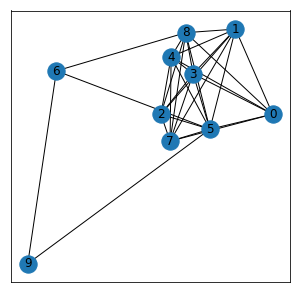

In [33]:
# drawing
import networkx as nx
import matplotlib.pyplot as plt

G_d = nx.from_scipy_sparse_matrix(doc_corr)
plt.figure(figsize=(5,5)) 
nx.draw_networkx(G_d)
plt.show()

In [34]:
# G-VSM based Term correlation
term_corr = TFM.T*TFM
print(term_corr.toarray())

[[ 1  1  0 ...  0  0  0]
 [ 1  5  0 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0 25]]


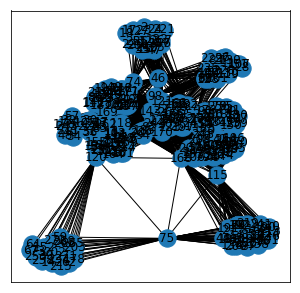

In [35]:
G_t = nx.from_scipy_sparse_matrix(term_corr)
plt.figure(figsize=(5,5)) 
nx.draw_networkx(G_t)
plt.show()

##### 2.3 Social network analysis

In [36]:
# Dijkstra’s algorithm (shortest path)
print(nx.dijkstra_path(G_d, 2, 1))

[2, 1]


In [37]:
# Centralities
print(nx.degree_centrality(G_d))
print(nx.eigenvector_centrality(G_d))

{0: 0.8888888888888888, 1: 1.0, 2: 0.8888888888888888, 3: 1.0, 4: 1.0, 5: 1.222222222222222, 6: 0.5555555555555556, 7: 1.0, 8: 1.1111111111111112, 9: 0.4444444444444444}
{0: 0.3145806112951853, 1: 0.35447126035872367, 2: 0.3145806112951853, 3: 0.35447126035872367, 4: 0.35447126035872367, 5: 0.37875374718638355, 6: 0.11917645422327741, 7: 0.35447126035872367, 8: 0.3695839296272643, 9: 0.07231093295896728}


In [38]:
# Communities
from networkx.algorithms import community

communities_generator = community.girvan_newman(G_d)
top_level_communities = next(communities_generator)
print(top_level_communities)

second_level_communities = next(communities_generator)
print(second_level_communities)

third_level_communities = next(communities_generator)
print(third_level_communities)

({0, 1, 2, 3, 4, 5, 6, 7, 8}, {9})
({0, 1, 2, 3, 4, 5, 7, 8}, {6}, {9})
({0}, {1, 2, 3, 4, 5, 7, 8}, {6}, {9})


In [39]:
# Link prediction
aai = nx.adamic_adar_index(G_d)

for u, v, p in aai:
    print('(%d, %d) -> %.8f' % (u, v, p))

(0, 9) -> 0.41703239
(0, 2) -> 2.67180533
(0, 6) -> 0.85132687
(1, 9) -> 0.41703239
(1, 6) -> 0.85132687
(2, 9) -> 0.41703239
(2, 6) -> 0.85132687
(3, 9) -> 0.41703239
(3, 6) -> 0.85132687
(4, 9) -> 0.41703239
(4, 6) -> 0.85132687
(6, 7) -> 0.85132687
(7, 9) -> 0.41703239
(8, 9) -> 1.03836733


##### 2.4 Assosiation rule mining

In [40]:
# Bucket 형태로 데이터 변환
itemset = [[[vectorizer.get_feature_names()[idx]]*num for idx, num in enumerate(doc) if num != 0] for doc in TFM.toarray()]
itemset = [sum(item, []) for item in itemset]
print(itemset[0])

['activates', 'activating', 'assist', 'backup', 'backup', 'based', 'command', 'command', 'command', 'control', 'controller', 'controller', 'controller', 'element', 'element', 'includes', 'including', 'including', 'initiation', 'initiation', 'input', 'input', 'input', 'instantaneous', 'management', 'management', 'mode', 'mode', 'mode', 'mode', 'outputting', 'position', 'receives', 'receives', 'rotary', 'rotary', 'rotatable', 'steering', 'steering', 'steering', 'terrain', 'terrain', 'trailer', 'trailer', 'vehicle', 'vehicle']


In [41]:
from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import apriori, association_rules
 
encoder = TransactionEncoder()
oht_ary = encoder.fit_transform(itemset)
df = pd.DataFrame(oht_ary, columns=encoder.columns_)       
 
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
print (frequent_itemsets)
 
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
print (rules)

    support                    itemsets
0       0.3                      (axis)
1       0.3                   (control)
2       0.4                    (device)
3       0.3                   (extends)
4       0.6                  (includes)
5       0.3                     (order)
6       0.3                 (plurality)
7       0.4                 (substrate)
8       0.3             (extends, axis)
9       0.3           (axis, plurality)
10      0.3         (includes, control)
11      0.3        (extends, plurality)
12      0.3       (includes, substrate)
13      0.3  (extends, axis, plurality)
             antecedents           consequents  antecedent support  \
0              (extends)                (axis)                 0.3   
1                 (axis)             (extends)                 0.3   
2                 (axis)           (plurality)                 0.3   
3            (plurality)                (axis)                 0.3   
4             (includes)             (control)    

##### 2.5 Sentiment analysis

In [42]:
# VADER in NLTK (Valence Aware Dictionary and sEntiment Reasoner)
import nltk
nltk.download('vader_lexicon') # VADER는 사전기반의 감성분석 방법이라, 사전 다운로드가 필요함

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [43]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

summary = {"positive":0,"neutral":0,"negative":0}
for doc in sample_corpus: 
    print(analyzer.polarity_scores(doc))

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.014, 'neu': 0.986, 'pos': 0.0, 'compound': -0.0516}
{'neg': 0.0, 'neu': 0.984, 'pos': 0.016, 'compound': 0.2023}
{'neg': 0.12, 'neu': 0.88, 'pos': 0.0, 'compound': -0.9274}
{'neg': 0.0, 'neu': 0.906, 'pos': 0.094, 'compound': 0.9014}
{'neg': 0.0, 'neu': 0.982, 'pos': 0.018, 'compound': 0.3182}
{'neg': 0.04, 'neu': 0.913, 'pos': 0.047, 'compound': -0.0772}
{'neg': 0.0, 'neu': 0.939, 'pos': 0.061, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'compound': 0.9393}
{'neg': 0.038, 'neu': 0.924, 'pos': 0.038, 'compound': -0.0088}
